In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_auc_score
from sklearn.model_selection  import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import model_selection

In [0]:
bank = pd.read_csv('bank.csv',sep = ';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
bank.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


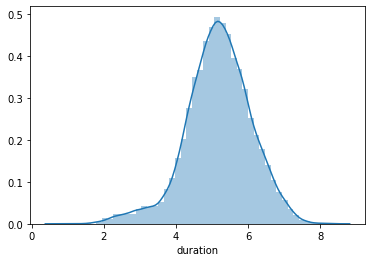

In [0]:
sns.distplot(bank['duration'].map(lambda x:np.log1p(x)))

In [0]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [0]:
bank = bank[bank['duration']>0]

In [0]:
bank['y']=bank['y'].map(lambda x: False if x=='no' else True)

Text(0.5, 1.0, 'Age & y')

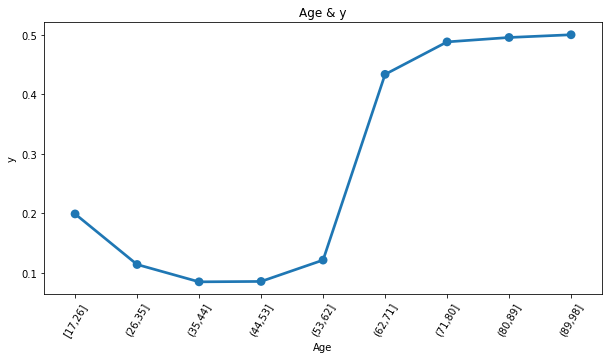

In [0]:
bank['Age'] = pd.cut(bank['age'],9, labels=['[17,26]','(26,35]','(35,44]','(44,53]','(53,62]','(62,71]','(71,80]','(80,89]','(89,98]'])
t = bank.groupby('Age',as_index=False)['y'].mean()
plt.figure(figsize=(10,5))
sns.pointplot(x='Age',y='y',data=t)
plt.xticks(rotation=60)
plt.title('Age & y')

In [0]:
bank['prestr']=bank['previous'].apply(str)
bank.groupby('prestr')['y'].mean()

prestr
0    0.088332
1    0.212015
2    0.464191
3    0.592593
4    0.542857
5    0.722222
6    0.600000
7    0.000000
Name: y, dtype: float64

In [0]:
bank.groupby('job')['y'].mean()

job
admin.           0.129738
blue-collar      0.068958
entrepreneur     0.085165
housemaid        0.100000
management       0.112213
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: y, dtype: float64

In [0]:
bank.groupby('marital')['y'].mean()

marital
divorced    0.103231
married     0.101585
single      0.140041
unknown     0.150000
Name: y, dtype: float64

In [0]:
bank.groupby('education')['y'].mean()

education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078259
high.school            0.108378
illiterate             0.222222
professional.course    0.113485
university.degree      0.137257
unknown                0.145003
Name: y, dtype: float64

In [0]:
bank.groupby('default')['y'].mean()

default
no         0.128806
unknown    0.051530
yes        0.000000
Name: y, dtype: float64

In [0]:
bank.groupby('housing')['y'].mean()

housing
no         0.108802
unknown    0.108081
yes        0.116210
Name: y, dtype: float64

In [0]:
bank.groupby('loan')['y'].mean()

loan
no         0.113415
unknown    0.108081
yes        0.109315
Name: y, dtype: float64

In [0]:
bank.groupby('contact')['y'].mean()

contact
cellular     0.147393
telephone    0.052317
Name: y, dtype: float64

In [0]:
bank.groupby('month')['y'].mean()

month
apr    0.204865
aug    0.106039
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064357
nov    0.101439
oct    0.438719
sep    0.449123
Name: y, dtype: float64

In [0]:
bank.groupby('day_of_week')['y'].mean()

day_of_week
fri    0.108101
mon    0.099495
thu    0.121188
tue    0.117829
wed    0.116671
Name: y, dtype: float64

Text(0.5, 1.0, 'Campaign & y')

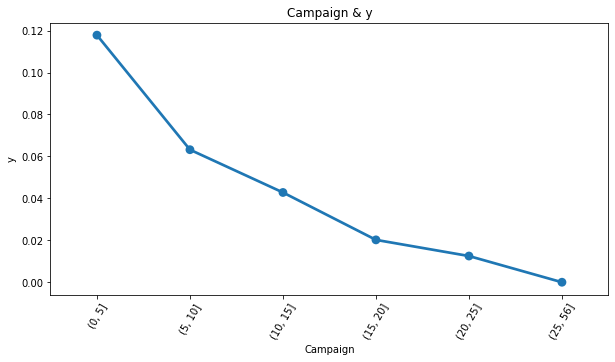

In [0]:
bank['Campaign'] = pd.cut(bank['campaign'],[0,5,10,15,20,25,56])
c=bank.groupby('Campaign',as_index=False)['y'].mean()
plt.figure(figsize=(10,5))
sns.pointplot(x='Campaign',y='y',data=c)
plt.xticks(rotation=60)
plt.title('Campaign & y')

Text(0.5, 1.0, 'Pdays & y')

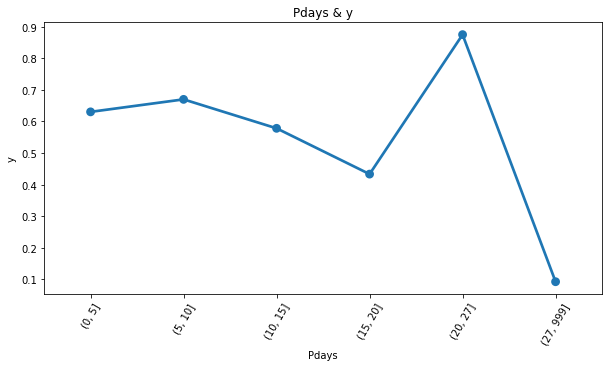

In [0]:
bank['Pdays'] = pd.cut(bank['pdays'],[0,5,10,15,20,27,999])
p=bank.groupby('Pdays',as_index=False)['y'].mean()
plt.figure(figsize=(10,5))
sns.pointplot(x='Pdays',y='y',data=p)
plt.xticks(rotation=60)
plt.title('Pdays & y')

In [0]:
bank.groupby('poutcome',as_index=False)['y'].mean()

,poutcome,y
0,failure,0.142286
1,nonexistent,0.088332
2,success,0.651129


In [0]:
#bank[['month','day_of_week','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].drop_duplicates()
#bank[['month','day_of_week','emp.var.rate']].drop_duplicates()
pd.unique(bank['nr.employed'])

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [0]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
bank = pd.read_csv('bank.csv',sep = ';')
bank.drop(['duration'],axis = 1,inplace=True)
bank['y']=bank['y'].map(lambda x: False if x=='no' else True)
#bank['duration'] = bank['duration'].map(lambda x:np.log1p(x))
data=pd.get_dummies(bank)
data.head()
y=data.y
x=data.drop('y',axis=1)
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.3,random_state=99)

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
trainx_res, trainy_res = sm.fit_sample(trainx, trainy)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
neg = data[data.y==False]#36548
pos = data[data.y==True]#4640

In [0]:
#from sklearn.utils import resample
#pos_upsampled = resample(pos,replace=True,  # sample with replacement
#                             n_samples=36544,  # to match majority class
#                             random_state=1)  # reproducible results
#data_upsampled = pd.concat([neg, pos_upsampled])
#y_upsampled=data_upsampled.y
#x_upsampled=data_upsampled.drop('y',axis=1)
#trainx1,testx1,trainy1,testy1=train_test_split(x_upsampled,y_upsampled,test_size=0.3,random_state=99)


#downsampled = resample(neg, replace=False,n_samples=4640, random_state=1)

#dataset_downsampled = pd.concat([downsampled, pos])
#dataset_downsampled.y.value_counts()
#y=dataset_downsampled.y
#x=dataset_downsampled.drop('y',axis=1)
#trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=99)

In [0]:
def prc(model,testx,testy):

  lr_probs = model.predict_proba(testx)
  lr_probs = lr_probs[:, 1]
  yhat = model.predict(testx)
  lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
  lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

  print('KNN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
  # plot the precision-recall curves
  no_skill = len(testy[testy==1]) / len(testy)
  pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Model')
  pyplot.plot(lr_recall, lr_precision, marker='.', label='knn')
  # axis labels
  pyplot.xlabel('Recall')
  pyplot.ylabel('Precision')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

In [0]:
from sklearn.metrics import roc_curve
def roc(model,testx,testy):
    ns_probs = [0 for _ in range(len(testy))]
    lr_probs = model.predict_proba(testx)
# keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
# calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
    pyplot.figure(figsize=(10,5))
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random guess')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title('ROC')
# show the legend
    pyplot.legend()
# show the plot
    pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.761


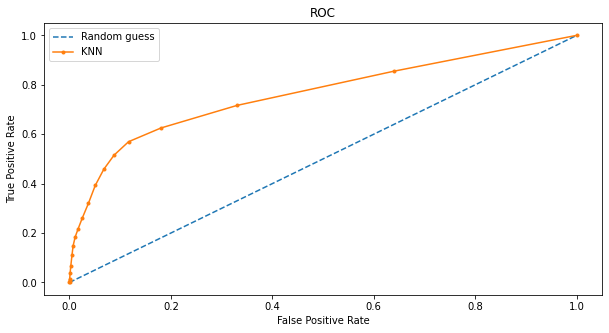

In [0]:
roc(model,testx,testy)

KNN: f1=0.321 auc=0.423


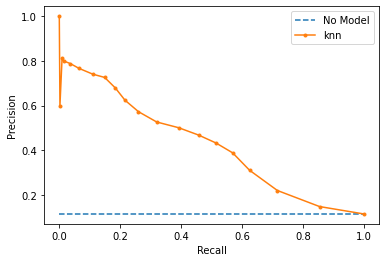

In [0]:
prc(model,testx,testy)

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


selectKBest = SelectKBest(f_regression, k=10)
feature = x
bestFeature = selectKBest.fit_transform(x, y)
x.columns[selectKBest.get_support()]


Index(['pdays', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed',
       'contact_cellular', 'contact_telephone', 'month_mar',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

k=1 61.78 (+/- 1.68)
k=2 67.32 (+/- 1.42)
k=3 70.37 (+/- 1.05)
k=4 72.19 (+/- 0.98)
k=5 73.59 (+/- 0.79)
k=6 74.37 (+/- 0.88)
k=7 75.03 (+/- 0.94)
k=8 75.47 (+/- 0.99)
k=9 75.82 (+/- 0.91)
k=10 76.10 (+/- 0.97)
k=11 76.22 (+/- 1.08)
k=12 76.47 (+/- 1.17)
k=13 76.47 (+/- 1.05)
k=14 76.72 (+/- 0.83)
k=15 76.95 (+/- 0.88)
k=16 77.10 (+/- 0.97)
k=17 77.24 (+/- 0.91)
k=18 77.43 (+/- 0.98)
k=19 77.34 (+/- 1.03)
k=20 77.39 (+/- 0.96)
k=21 77.45 (+/- 0.89)
k=22 77.62 (+/- 0.95)
k=23 77.77 (+/- 0.88)
k=24 77.72 (+/- 0.90)
k=25 77.73 (+/- 0.93)
k=26 77.76 (+/- 0.85)
k=27 77.84 (+/- 0.95)
k=28 77.92 (+/- 0.96)
k=29 77.92 (+/- 0.96)
k=30 77.90 (+/- 0.90)


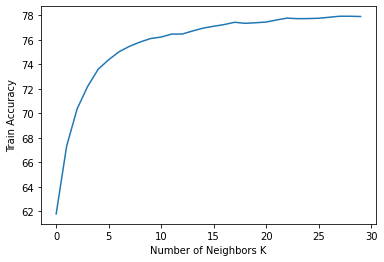

In [0]:
neighbors = np.arange(0,30)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value)
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, trainx, trainy, cv=kfold, scoring='roc_auc')
    #roc_auc
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

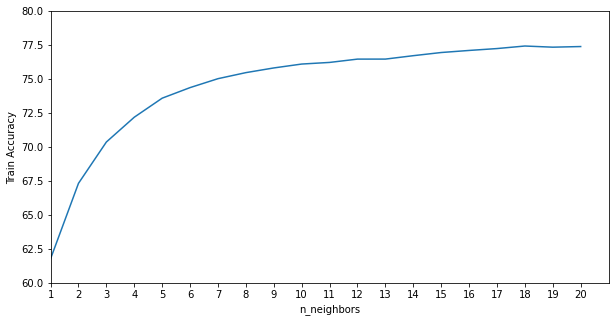

In [0]:
s = cv_scores[:20]
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,21).astype(dtype=np.str), s)
plt.xlabel('n_neighbors')
plt.ylabel('Train Accuracy')
plt.axis([0,20,60,80])
plt.show()

In [0]:
parameter = {'n_neighbors': [i for i in range(1,25)]}
  
gs = GridSearchCV(KNeighborsClassifier(),parameter, scoring='roc_auc',cv=5)
gs.fit(x,y)
gs.best_params_
#gs = GridSearchCV(KNeighborsClassifier(),param_grid=parameter, scoring='roc_auc', cv=5)
#scores = cross_val_score(gs, trainx, trainy, scoring='roc_auc', cv=5)


{'n_neighbors': 1}

In [0]:
#model = KNeighborsClassifier(weights='distance',p=5, n_neighbors= 10)
model = KNeighborsClassifier(n_neighbors = 18)
model.fit(trainx,trainy)
prey=model.predict(testx)
print(confusion_matrix(testy,prey))
print(classification_report(testy,prey))
print(accuracy_score(testy,prey))
print(roc_auc_score(testy,prey))

[[10750   185]
 [ 1115   307]]
              precision    recall  f1-score   support

       False       0.91      0.98      0.94     10935
        True       0.62      0.22      0.32      1422

    accuracy                           0.89     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.89      0.87     12357

0.8947964716355102
0.5994874777887749


In [0]:
model = KNeighborsClassifier()
model.fit(trainx,trainy)
prey=model.predict(testx)
print(confusion_matrix(testy,prey))
print(classification_report(testy,prey))
print(accuracy_score(testy,prey))
print(roc_auc_score(testy,prey))

[[7028  266]
 [ 682  262]]
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      7294
        True       0.50      0.28      0.36       944

    accuracy                           0.88      8238
   macro avg       0.70      0.62      0.65      8238
weighted avg       0.86      0.88      0.87      8238

0.8849235251274581
0.6205370213734994


In [0]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNN: f1=0.335 auc=0.415


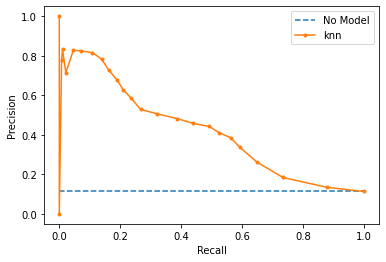

In [0]:
prc(model,testx,testy)

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=160,silent=True,objective='binary:logistic')
xgb.fit(trainx, trainy)
xgbprd = xgb.predict(testx)

print(confusion_matrix(testy, xgbprd ))
print(round(accuracy_score(testy, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = trainx, y = trainy, cv = 10).mean())

[[10743   219]
 [ 1028   366]]
90.0


In [0]:
XGB

0.9013806917624505

In [0]:
print(classification_report(testy,xgbprd))

              precision    recall  f1-score   support

       False       0.91      0.98      0.95     10962
        True       0.63      0.26      0.37      1394

    accuracy                           0.90     12356
   macro avg       0.77      0.62      0.66     12356
weighted avg       0.88      0.90      0.88     12356



In [0]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
bank = pd.read_csv('bank.csv',sep = ';')
bank.drop(['duration'],axis = 1,inplace=True)
bank['y']=bank['y'].map(lambda x: False if x=='no' else True)
#bank['duration'] = bank['duration'].map(lambda x:np.log1p(x))
data=pd.get_dummies(bank)
data.head()
y=data.y
x=data.drop('y',axis=1)
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=1)

In [0]:
model = KNeighborsClassifier(3)
model.fit(trainx,trainy)
prey=model.predict(testx)
print(confusion_matrix(testy,prey))
print(classification_report(testy,prey))
print(accuracy_score(testy,prey))
print(roc_auc_score(testy,prey))
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(scores.mean())
scores = cross_val_score(model, x, y, cv=5, scoring='roc_auc')
print(scores.mean())

[[6974  320]
 [ 638  306]]
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      7294
        True       0.49      0.32      0.39       944

    accuracy                           0.88      8238
   macro avg       0.70      0.64      0.66      8238
weighted avg       0.87      0.88      0.87      8238

0.883709638261714
0.6401404335116395
0.5689428791734121
0.3729867051034271


In [0]:
model = KNeighborsClassifier(3)
model.fit(trainx,trainy)
prey=model.predict(testx)
print(confusion_matrix(testy,prey))
print(classification_report(testy,prey))
print(accuracy_score(testy,prey))
print(roc_auc_score(testy,prey))
print(f1_score(testy,prey))

[[6974  320]
 [ 638  306]]
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      7294
        True       0.49      0.32      0.39       944

    accuracy                           0.88      8238
   macro avg       0.70      0.64      0.66      8238
weighted avg       0.87      0.88      0.87      8238

0.883709638261714
0.6401404335116395
0.38980891719745225


k=1 63.03
k=2 58.01
k=3 64.01
k=4 59.31
k=5 63.36
k=6 60.28
k=7 63.15
k=8 60.50
k=9 62.96
k=10 60.33
k=11 62.59
k=12 61.03
k=13 62.25
k=14 60.78
k=15 62.10
k=16 60.73
k=17 61.34
k=18 60.28
k=19 61.36
k=20 60.34


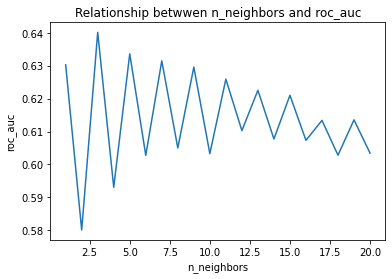

In [0]:
neighbors = np.arange(1,21)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(trainx,trainy)
    prey=knn.predict(testx)
    score = roc_auc_score(testy,prey)
    cv_scores.append(score)
    print("k=%d %0.2f" % (k, score*100))


plt.plot(neighbors, cv_scores)
plt.xlabel('n_neighbors')
plt.ylabel('roc_auc')
plt.title('Relationship betwwen n_neighbors and roc_auc')
plt.show()

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
parameters = {
    'max_depth': [5, 10, 15, 20, 25]
}
#max depth 5
#    'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]
#    'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]
xlf = xgb.XGBClassifier(max_depth=10,
                        learning_rate=0.01,
                        n_estimators=2000,
                        silent=True,
                        objective='binary:logistic',
                        nthread=-1,
                        gamma=0,
                        min_child_weight=1,
                        max_delta_step=0,
                        subsample=0.85,
                        colsample_bytree=0.7,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        seed=1440,
                        missing=None)

gsearch = GridSearchCV(xlf, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(trainx, trainy)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.7, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=2000, n_jobs=1,
                                     nthread=-1, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=1440, silent=True,
                                     subsample=0.85, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', ver

In [0]:
xlf = xgb.XGBClassifier(max_depth=5,
                        learning_rate=0.01,
                        n_estimators=2000,
                        silent=True,
                        objective='binary:logistic',
                        nthread=-1,
                        gamma=0,
                        min_child_weight=1,
                        max_delta_step=0,
                        subsample=0.85,
                        colsample_bytree=0.7,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        seed=1440,
                        missing=None)
xlf.fit(trainx,trainy)
prdy = xlf.predict(testx)
print(confusion_matrix(testy,prdy))
print(classification_report(testy,prdy))
print(accuracy_score(testy,prdy))
print(roc_auc_score(testy,prdy))
print(f1_score(testy,prdy))

[[7149  145]
 [ 680  264]]
              precision    recall  f1-score   support

       False       0.91      0.98      0.95      7294
        True       0.65      0.28      0.39       944

    accuracy                           0.90      8238
   macro avg       0.78      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238

0.8998543335761107
0.629890832028182
0.3902439024390243
